In [2]:
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;

hab = pd.read_csv('haberman.csv');


In [27]:
#knowing no of points
print(hab.shape)

(306, 3)


In [14]:
#knowing no features or columns
print(len(hab.columns));

#knowing features of haberman dataset
print(hab.columns)

4
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [15]:
#determining number of classes and data-points per class
hab['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# Objective
objective is to classify patients who survived five years or longer and patients who died within five years.

# Observations
* There are 306 points in haberman dataset
* There are 4 columns present namely 'age', 'year', 'nodes', 'status'.
* Here status as 1 represent survived 5 years or longer and status as 2 represent died within 5 years.
* There are 225 people survived and 81 died.


## Doing univariate analysis for each feature

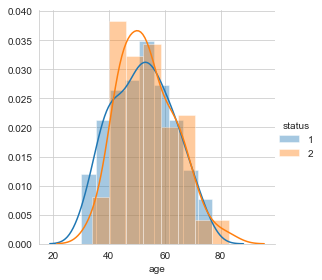

In [96]:
#generating pdf for age
sns.FacetGrid(hab, hue="status", size=4).map(sns.distplot, 'age')\
    .add_legend()

### Observations
* There are more people who survived with age <= 40 than died people.
* Still we can't distinguish survived and not survived on the basis of age only, because both survived and not survived are overlapping each other

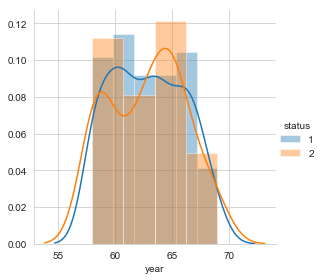

In [97]:
#generating pdf for year
sns.FacetGrid(hab, hue="status", size=4)\
    .map(sns.distplot, 'year')\
    .add_legend();

### Observations
* Clearly we can't classify survived and dead on the basis of 'year' because both are highly overlapping each other.

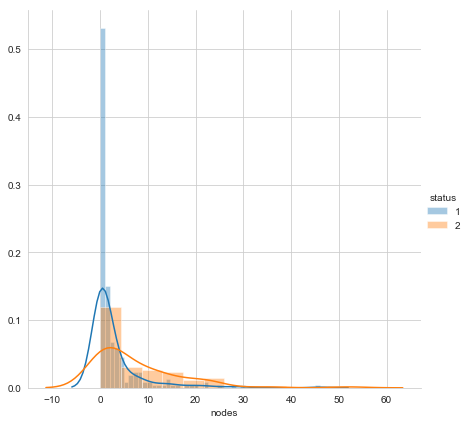

In [99]:
#generating pdf for nodes
sns.FacetGrid(hab, hue="status", size=6)\
    .map(sns.distplot, 'nodes')\
    .add_legend();

### Observations
* The number of people survived is much higher than died people when there were 0 nodes.
* Number of people who died increases as number of nodes increases.
* Number of died people become larger than number of survived when nodes are 2 or more.
* Using this also we can't clearly classify them, because of too much overlapping.

In [55]:
#getting data for each status(survived or not) seperately
survived = hab.loc[hab['status'] == 1];
not_survived = hab.loc[hab['status']==2];

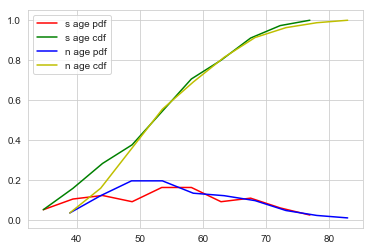

In [103]:
#plotting CDF of age for survived and not survived status

#for survived
counts, bin_edges = np.histogram(survived['age'], bins=10, density=True)
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, 'r', label='s age pdf');
plt.plot(bin_edges[1:], cdf, 'g', label='s age cdf');


#for not survived
counts, bin_edges = np.histogram(not_survived['age'], bins=10, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, 'b', label='n age pdf');
plt.plot(bin_edges[1:], cdf, 'y', label='n age cdf');

plt.legend()
plt.show()

### Observations
* according to above graph, we can say that people with age less than 30 are survived, but this is only 18% of population who survived.
* We can't classify further using this because of too much overlapping.

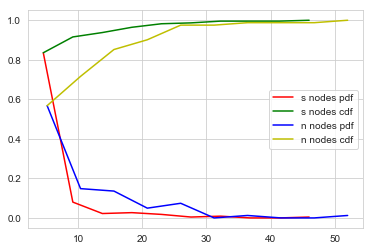

In [105]:
#plotting cdf and pdf of nodes for survived or not survived
plt.close()

#for survived
counts, bin_edges = np.histogram(survived['nodes'], bins=10, density=True);
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, 'r', label='s nodes pdf');
plt.plot(bin_edges[1:], cdf, 'g', label='s nodes cdf');

#for not survived
counts, bin_edges = np.histogram(not_survived['nodes'], bins=10, density=True);
pdf = counts/(sum(counts));
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, 'b', label='n nodes pdf');
plt.plot(bin_edges[1:], cdf, 'y', label='n nodes cdf');

plt.legend()
plt.show()

### Observations
* clearly people having nodes more than 45 were dead, but this is only 5-10% of people who died.
* Even using nodes we can't clearly classify them.
* About 82% of people survived people had nodes less 4 or 3.

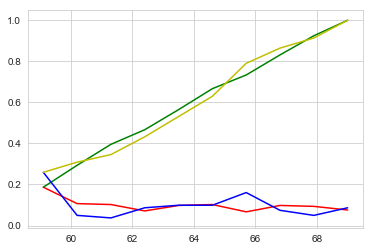

In [131]:
#plotting cdf and pdf of year for survived and not survived
plt.close()
#for survived
counts, bin_edges = np.histogram(survived['year'], bins=10, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, 'r');
plt.plot(bin_edges[1:], cdf, 'g');


#for not survived
counts, bin_edges = np.histogram(not_survived['year'], bins=10, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, 'b');
plt.plot(bin_edges[1:], cdf, 'y');

plt.show()

### Observation
* Can't distinguish on the basis of year, they are highly overlapping each other.

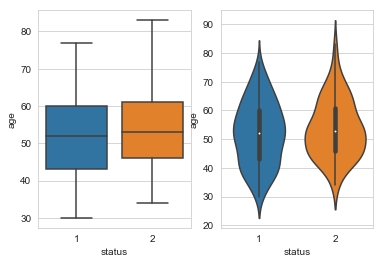

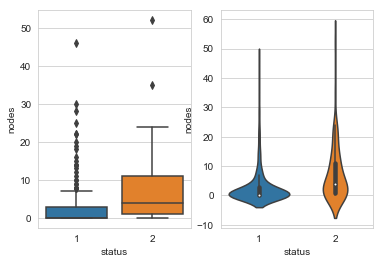

In [124]:
#plotting box-plot and violin plot for age 
plt.close()

plt.figure(1)
ax = plt.subplot(121)
sns.boxplot(x='status', y='age', data=hab, ax=ax)

ax = plt.subplot(122)
sns.violinplot(x='status', y='age', data=hab, ax=ax);

#plotting box-plot and violin plot for nodes
plt.figure(2);
ax = plt.subplot(121);
sns.boxplot(x='status', y='nodes', data=hab, ax=ax);

ax = plt.subplot(122);
sns.violinplot(x='status', y='nodes', data=hab, ax=ax);

plt.show()


### observations
* We can't classify them on basis of age as they are overlapping too much.
* While plotting for nodes, we can see that 75 percentage of people survived who had nodes 2 or less.
* And 50% population died who had nodes more than 2
* So among age, nodes and year feature's, the number of nodes is giving somewhat clearity while classifying survived and died,
* we can build a basic model with if-else, which can decide survived with 75% accuracy and not survived with 50 % acurracy, but there are some outliers so we can't depend on this model completely.


## Doing bivariate analysis

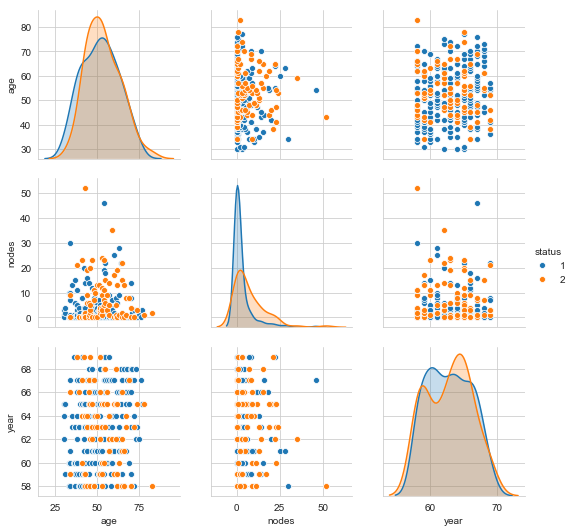

In [126]:
sns.pairplot(hab, hue='status', vars=['age', 'nodes', 'year']);
plt.plot();

### Observations
* There is too much overlapping in each combination of features, so seeing this we can't classify survived or died.

## Doing Multivariate analysis

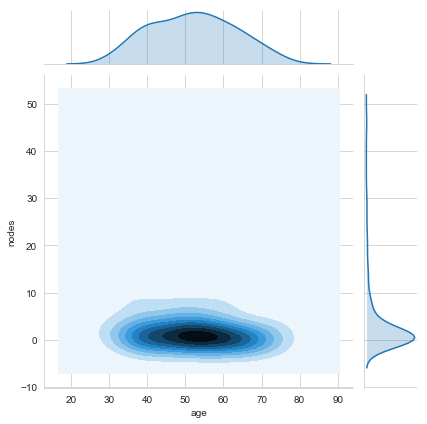

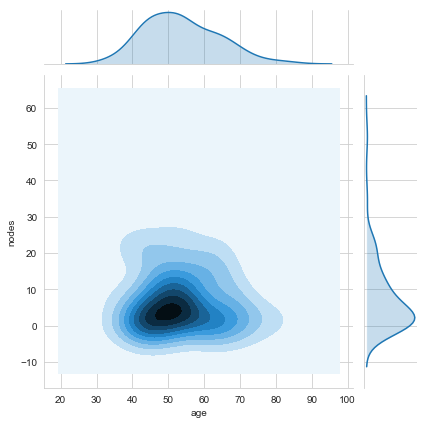

In [141]:
#ploting jointplot, contour for age and nodes.
plt.close()

sns.jointplot(x='age', y='nodes', data=survived, kind='kde');
plt.plot();

sns.jointplot(x='age', y='nodes', data=not_survived, kind='kde');
plt.plot();


### Observations
* Large number of people who were of age between 50 to 60 with nodes 0, 1 or 2 were survived.
* Large number of people who were of age between 45 to 55 with nodes 3 to 5 were died within 5 years.


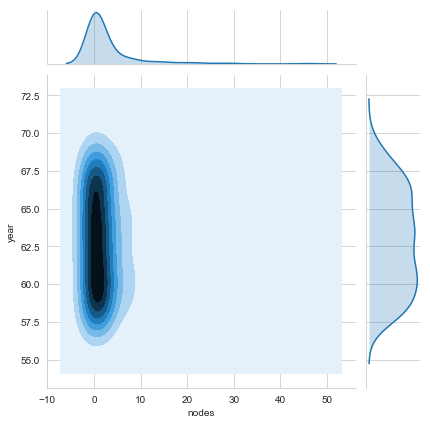

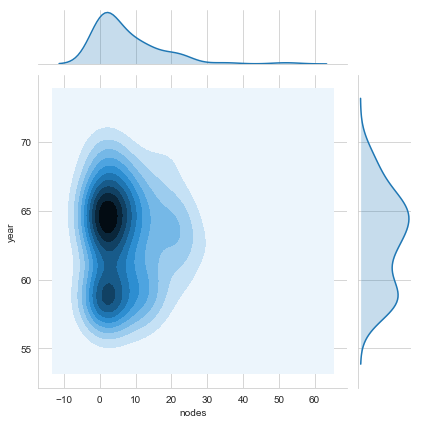

In [145]:
#ploting jointplot, contour for age and nodes.
plt.close()

sns.jointplot(x='nodes', y='year', data=survived, kind='kde');
plt.plot();

sns.jointplot(x='nodes', y='year', data=not_survived, kind='kde');
plt.plot();


### Observations
1. Major number of population with nodes 0 or 1 were survived between years 59 and 66.5 years
2. Major number of population with nodes 0 or 1 or 2 were died between years 63 and 67 years.

<h2>Plotting Pair plot</h2>

LinAlgError: singular matrix

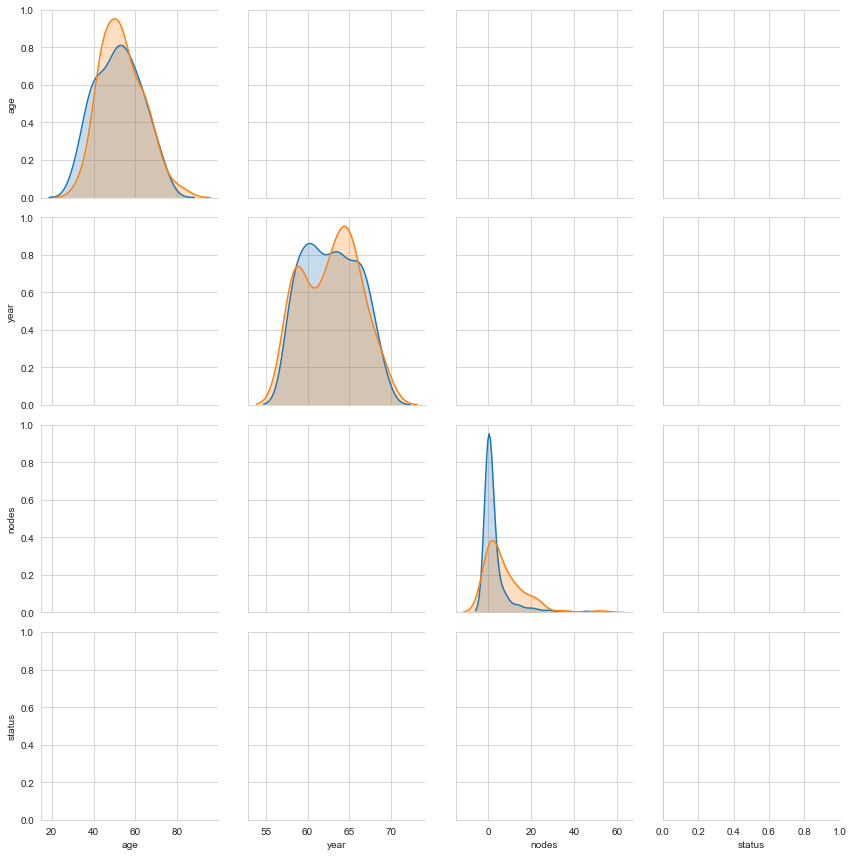

In [4]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hab, hue="status", size=3);
plt.show()

n = df.shape[0]
sns.pairplot(df[['age', 'year', 'nodes', 'status'][0:n], hue='is_duplicate', vars=['age', 'year', 'nodes', 'status'])
plt.show()

## Summary:
1. None of the plot were able to clearly classify survived and not survived.
2. However by using CDF and PDF plot using no. of 'nodes' we can say that about 82% population who survived had nodes less than 3 or 4, that means if a person have nodes less than 3 or 4 then there are high chances of surviving.
3. Further extending 'nodes' with 'age' (using jointplot) we can say that people having age between 50 to 60 and with nodes less than 3 have higher chance of surviving.
4. So on the basis of we can say that still these plots are not clearly classifying, but we can make some decision using age and nodes feature together.
